# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [138]:
# %matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# Font Sizes 
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('figure', figsize = (8, 6)) # Figure Size

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000), # loc = mean, scale = std
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [24]:
# Sua análise da parte 1 começa aqui.
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


Observa-se estatisticamente que devido à escolha de parâmetros, as duas distribuições se assemelham bastante.

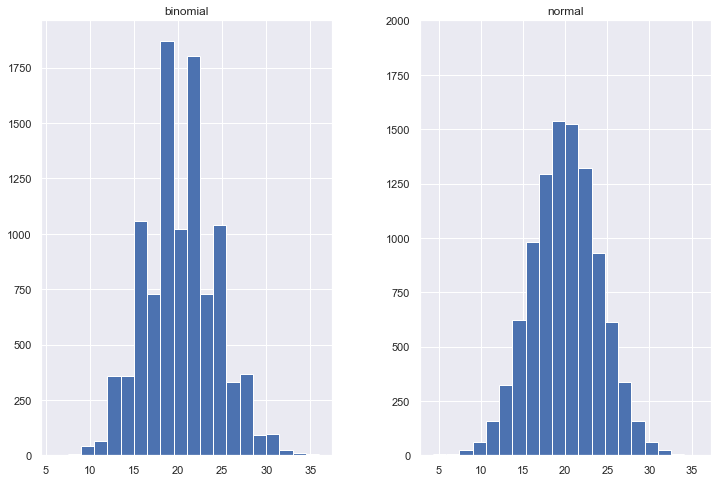

In [50]:
dataframe.hist(bins = 20) # eixo y com escalas distintas
plt.ylim(0,2000);

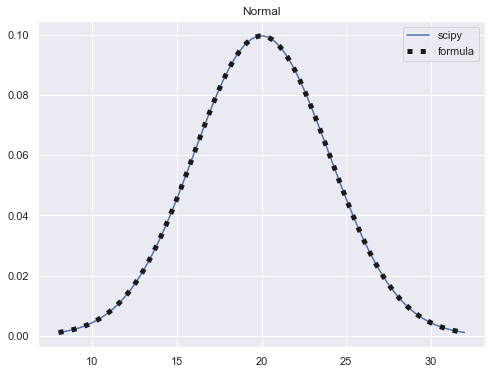

In [47]:
# Normal
from math import pi

mu = 20 # loc = mean
sigma = 4 # scale = std
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

p = 1/np.sqrt(2*pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(x, sct.norm.pdf(x, mu, sigma), label='scipy')
plt.plot(x, p, 'k:', lw=5, label='formula')
plt.title('Normal')
plt.legend();


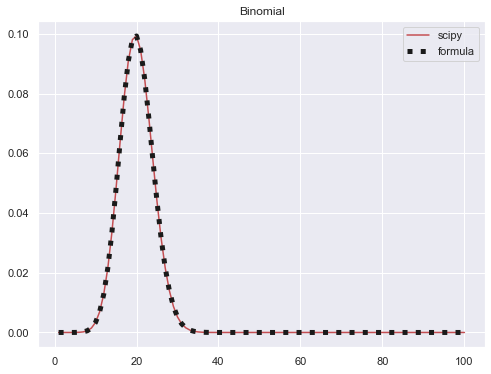

In [48]:
# binomial

from math import factorial

n = 100 
p = 0.2
k_vec = np.arange(1,n+1) # target, starts at 1 goes to n, all possible outcomes

def compute_binomial_prob(n,k,p):
  return factorial(n)/(factorial(k)*factorial(n-k)) * p**k * (1-p)**(n-k)

P_vec = [compute_binomial_prob(n, k, p) for k in k_vec]

plt.plot(k_vec, sct.binom.pmf(k_vec, n, p), 'r', label='scipy')
plt.plot(k_vec, P_vec, 'k:', lw=5, label='formula')
plt.title('Binomial')

plt.legend();

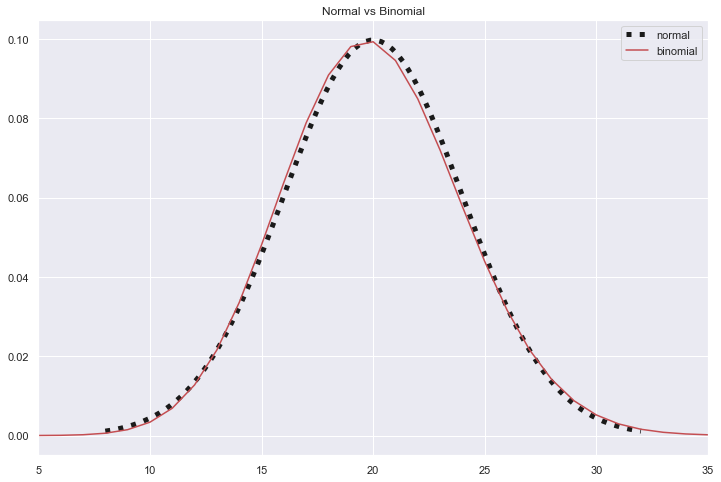

In [40]:
plt.plot(x, sct.norm.pdf(x, mu, sigma), 'k:', lw=5, label='normal')
plt.plot(k_vec, sct.binom.pmf(k_vec, n, p), 'r', label='binomial')
plt.title("Normal vs Binomial")
plt.xlim(5,35) # limitar range x
plt.legend();

Observa-se graficamente que devido à escolha de parâmetros, as duas distribuições se assemelham bastante.

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [21]:
def q1():
    describe = dataframe.describe()
    
    q1_norm = describe.loc['25%','normal']
    q1_binom = describe.loc['25%','binomial']
    q2_norm = describe.loc['50%','normal']
    q2_binom = describe.loc['50%','binomial']
    q3_norm = describe.loc['75%','normal']
    q3_binom = describe.loc['75%','binomial']

    orig_tuple = (q1_norm - q1_binom, q2_norm - q2_binom, q3_norm - q3_binom)
    rounded_tuple = tuple(map(lambda x: round(x, 3), orig_tuple))

    return rounded_tuple

In [66]:
# Teste
# q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [62]:
def q2():
    
    normal = dataframe[['normal']]
    normal_mean = normal.mean()
    normal_std = normal.std()
    n = 1
    
    bool_normal_lt_mean_plus_n_std = normal < (normal_mean + n*normal_std)
    bool_normal_lt_mean_minus_n_std = normal < (normal_mean - n*normal_std)
    
    P_normal_lt_mean_plus_n_std = bool_normal_lt_mean_plus_n_std.mean()
    P_normal_lt_mean_minus_n_std = bool_normal_lt_mean_minus_n_std.mean()
    
    P_normal_between_range_n_std = P_normal_lt_mean_plus_n_std - P_normal_lt_mean_minus_n_std
    
    return round(P_normal_between_range_n_std.item(),3)

In [63]:
# Teste
# q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [59]:
def P_normal_between_range_n_std(normal=dataframe[['normal']], n=1):
    
    normal_mean = normal.mean()
    normal_std = normal.std()
    
    bool_normal_lt_mean_plus_n_std = normal < (normal_mean + n*normal_std)
    bool_normal_lt_mean_minus_n_std = normal < (normal_mean - n*normal_std)
    
    P_normal_lt_mean_plus_n_std = bool_normal_lt_mean_plus_n_std.mean()
    P_normal_lt_mean_minus_n_std = bool_normal_lt_mean_minus_n_std.mean()
    
    P_normal_between_range_n_std = P_normal_lt_mean_plus_n_std - P_normal_lt_mean_minus_n_std
    
    return round(P_normal_between_range_n_std.item(),3)
   

In [65]:
P_normal_between_range_n_std(n=1) # teórico: 68.2689492%

0.684

In [60]:
P_normal_between_range_n_std(n=2) # teórico: 95.4499736%

0.954

In [61]:
P_normal_between_range_n_std(n=3) # teórico: 99.7300204%

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [73]:
def q3():
    m_norm = dataframe['normal'].mean()
    m_binom = dataframe['binomial'].mean()

    v_norm = dataframe['normal'].var()
    v_binom = dataframe['binomial'].var()

    orig_tuple = (m_binom - m_norm, v_binom - v_norm)
    rounded_tuple = tuple(map(lambda x: round(x, 3), orig_tuple))

    return rounded_tuple

In [74]:
# Teste
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

* As médias são próximas.
* Os desvios padrão também, mas eles são elevados ao quadrado para se obter a variância, então a diferença aumenta.

In [77]:
df_norm_binom_n50_100_200 = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                                     "binomial_n_50": sct.binom.rvs(50, 0.2, size=10000),
                                     "binomial_n_100": sct.binom.rvs(100, 0.2, size=10000),
                                     "binomial_n_200": sct.binom.rvs(200, 0.2, size=10000)})
df_norm_binom_n50_100_200.describe()

,normal,binomial_n_50,binomial_n_100,binomial_n_200
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,20.075569,10.033600,20.016400,39.99010
std,3.983971,2.824193,3.989652,5.67255
min,4.869538,0.000000,6.000000,21.00000
25%,17.394550,8.000000,17.000000,36.00000
50%,20.089588,10.000000,20.000000,40.00000
75%,22.730677,12.000000,23.000000,44.00000
max,36.808104,21.000000,36.000000,67.00000


* Aumentar $n$ na binomial faz com que ela seja mais esparsa. Por que você admite mais valores discretos.
* Diminuir $n$ na binomial faz com que ela seja mais centrada. Por que você admite menos valores discretos.

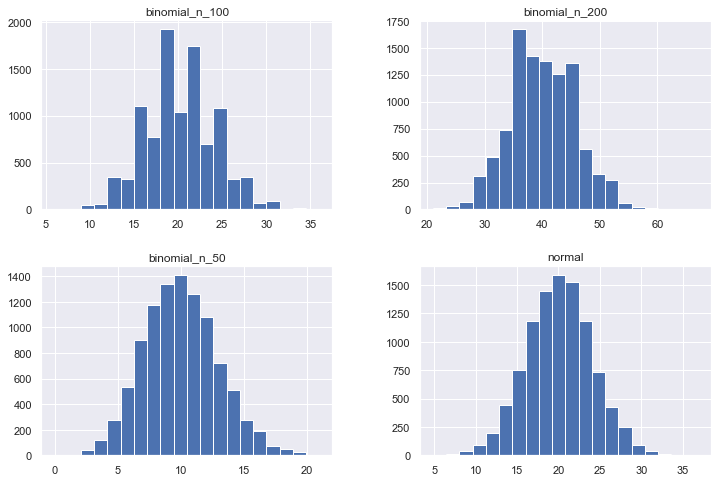

In [80]:
df_norm_binom_n50_100_200.hist(bins = 20); # atentar para eixo x e y com escalas distintas

## Parte 2

### _Setup_ da parte 2

In [96]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Inicie sua análise da parte 2 a partir daqui

In [83]:
# Sua análise da parte 2 começa aqui.
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [115]:
def q4():
    mean_profile_target0 = stars['mean_profile'].where(stars['target']==0).dropna()
    mu = mean_profile_target0.mean()
    sigma = mean_profile_target0.std()
    false_pulsar_mean_profile_standardized = (mean_profile_target0 - mu) / sigma
    
    q80 = sct.norm.ppf(0.8, loc=0, scale=1)
    q90 = sct.norm.ppf(0.9, loc=0, scale=1)
    q95 = sct.norm.ppf(0.95, loc=0, scale=1)
    
    p80 = (false_pulsar_mean_profile_standardized < q80).mean()
    p90 = (false_pulsar_mean_profile_standardized < q90).mean()
    p95 = (false_pulsar_mean_profile_standardized < q95).mean()

    orig_tuple = (p80, p90, p95)
    rounded_tuple = tuple(map(lambda x: round(x, 3), orig_tuple))

    return rounded_tuple

In [116]:
# Teste
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Media:  2.3556558898677207e-16
Var:  0.9999999999999999


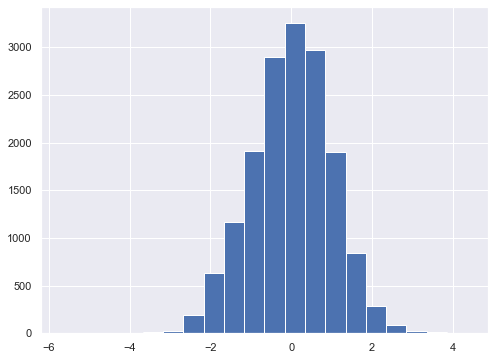

In [139]:
mean_profile_target0 = stars['mean_profile'].where(stars['target']==0).dropna()
mu = mean_profile_target0.mean()
sigma = mean_profile_target0.std()
z = (mean_profile_target0 - mu) / sigma
z.hist(bins=20);
print('Media: ', z.mean())
print('Var: ', z.var())

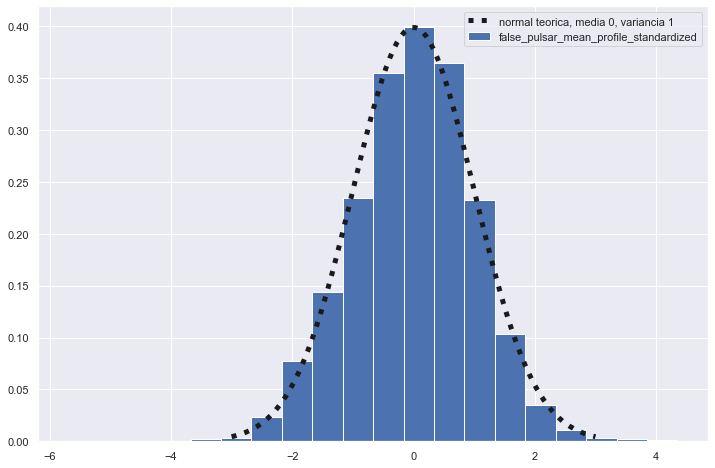

In [137]:
mu = 0 # loc = mean
sigma = 1 # scale = std
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
z.hist(bins=20, density=True, label='false_pulsar_mean_profile_standardized')
#plt.plot(x, sct.norm.pdf(x, mu, sigma), 'k:', lw=5, label='normal teorica, $\mu=0$, $\sigma^2=1$')
plt.plot(x, sct.norm.pdf(x, mu, sigma), 'k:', lw=5, label='normal teorica, media 0, variancia 1')
plt.legend();

A distribuição da variável `false_pulsar_mean_profile_standardized` é muito próxima de uma distribuição normal.

In [130]:
false_pulsar_mean_profile_standardized = z.copy()
false_pulsar_mean_profile_standardized.describe()

count    1.625800e+04
mean     2.355656e-16
std      1.000000e+00
min     -5.685134e+00
25%     -6.471532e-01
50%      3.985947e-02
75%      6.706549e-01
max      4.352157e+00
Name: mean_profile, dtype: float64

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [135]:
def q5():
   
    mean_profile_target0 = stars['mean_profile'].where(stars['target']==0).dropna()
    mu = mean_profile_target0.mean()
    sigma = mean_profile_target0.std()
    false_pulsar_mean_profile_standardized = (mean_profile_target0 - mu) / sigma

    describe = false_pulsar_mean_profile_standardized.describe()
    
    q1_pulsar = describe.loc['25%']
    q1_norm = sct.norm.ppf(0.25, loc=0, scale=1)
    q2_pulsar = describe.loc['50%']
    q2_norm = sct.norm.ppf(0.50, loc=0, scale=1)
    q3_pulsar = describe.loc['75%']
    q3_norm = sct.norm.ppf(0.75, loc=0, scale=1)
   

    orig_tuple = (q1_pulsar - q1_norm, q2_pulsar - q2_norm, q3_pulsar - q3_norm)
    rounded_tuple = tuple(map(lambda x: round(x, 3), orig_tuple))

    return rounded_tuple

In [136]:
# Teste
# q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.